In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
RunningInCOLAB

False

In [4]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-uripqsob
  Running command git clone --filter=blob:none --quiet https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-uripqsob
  Resolved https://github.com/Joeclinton1/google-images-download.git to commit e91e6a38ad654877f59edc7894822f5319d75df1
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/55/56/faf2aa238a0a8fbb7d5c11345a0f5e96358b7a3e144ba17b8b1c64f0b19a/selenium-4.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-

In [6]:
from google_images_download import google_images_download

In [8]:
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"auto,bulldozer,camion,camion_minero,camioneta,excavadora,otro,persona",
             "limit":50,"print_urls":False}
paths = response.download(arguments)

print(paths)


Item no.: 1 --> Item name = auto
Evaluating...
Starting Download...
'NoneType' object is not subscriptable


TypeError: 'NoneType' object is not subscriptable

response = google_images_download.googleimagesdownload()
arguments = {"keywords":"auto,bulldozer,camion,camion_minero,camioneta,excavadora,otro,persona",
             "limit":50,"print_urls":False}
paths = response.download(arguments)

print(paths)
#"auto,bulldozer,camion,camion_minero,camioneta,excavadora,otro,persona"

In [7]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
from PIL import Image

In [8]:
import os

In [7]:
#os.getcwd()

In [8]:
#os.chdir("TF")

In [9]:
dataset = datasets.ImageFolder('downloads',
                              transform=transforms.Compose([
                                  #transforms.RandomResizedCrop(224),
                                  transforms.Resize(255),
                                  transforms.CenterCrop(255),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224, 0.225])
                                  ]))

class_names = dataset.classes
print(class_names)

['auto', 'bulldozer', 'camion', 'camion_minero', 'camioneta', 'excavadora', 'otro', 'persona']


In [10]:
n_test = int(len(dataset) * 1)
n_train = len(dataset) - n_test

train_dataset, test_dataset = random_split(dataset, [n_train, n_test])

print(f'n_train={len(train_dataset)}')
print(f'n_test={len(test_dataset)}')

n_train=0
n_test=913


In [11]:
#train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [12]:
def imshow(inp, title = None):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)

  if title is not None:
    plt.title(title)

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
device

device(type='cuda', index=0)

In [14]:
ft_model = models.resnet18(pretrained=True)
print(ft_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/home/ninja/anaconda3/envs/computer_vision/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ninja/anaconda3/envs/computer_vision/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
ft_model.fc = nn.Linear(512, 8)

In [16]:
ft_model_state_dict = torch.load('model.pth')
ft_model.load_state_dict(ft_model_state_dict)
ft_model = ft_model.to(device)

In [17]:
ft_optimizer = torch.optim.SGD(ft_model.parameters(), lr=0.001, momentum=0.9)

In [18]:
ft_optimizer_state_dict = torch.load('optimizer.pth')
ft_optimizer.load_state_dict(ft_optimizer_state_dict)

In [19]:
def visualize_model(model, num_images = 8):
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()
  
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)
      
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      
      for j in range(inputs.size()[0]):
        images_so_far += 1
        ax = plt.subplot(num_images//2, 2, images_so_far)
        ax.axis('off')
        ax.set_title(f'predicted: {class_names[preds[j]]}')
        imshow(inputs.cpu().data[j])
        
        if images_so_far == num_images:
          model.train(mode=was_training)
          return
    model.train(mode = was_training)

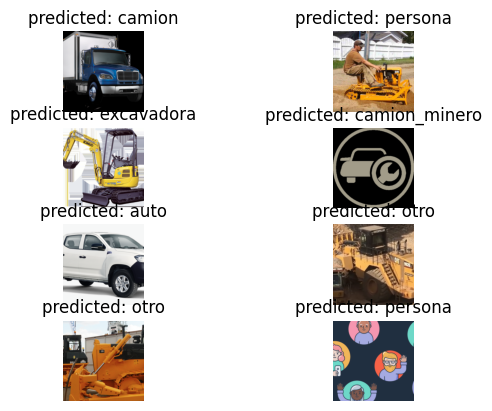

In [64]:
visualize_model(ft_model)

In [61]:
!wget https://p.turbosquid.com/ts-thumb/7H/mhn0Fg/Y7/mack2021granitemhdgarbagetruck01_02/jpg/1634910859/1800x1800/fit_q99/5dedd3acb39fbe979e7f60acac23dcd1ca40114b/mack2021granitemhdgarbagetruck01_02.jpg

--2023-10-09 19:33:25--  https://p.turbosquid.com/ts-thumb/7H/mhn0Fg/Y7/mack2021granitemhdgarbagetruck01_02/jpg/1634910859/1800x1800/fit_q99/5dedd3acb39fbe979e7f60acac23dcd1ca40114b/mack2021granitemhdgarbagetruck01_02.jpg
Resolviendo p.turbosquid.com (p.turbosquid.com)... 108.158.104.71, 108.158.104.47, 108.158.104.39, ...
Conectando con p.turbosquid.com (p.turbosquid.com)[108.158.104.71]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 947144 (925K) [image/jpeg]
Guardando como: “mack2021granitemhdgarbagetruck01_02.jpg.1”

mack2021granitemhdg 100%[===================>] 924,95K  2,36MB/s    en 0,4s    

2023-10-09 19:33:26 (2,36 MB/s) - “mack2021granitemhdgarbagetruck01_02.jpg.1” guardado [947144/947144]



In [59]:
img = Image.open('mack2021granitemhdgarbagetruck01_02.jpg')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    ft_model.to('cuda')

with torch.no_grad():
    output = ft_model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
# print(probabilities)

top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(class_names[top5_catid[i]], top5_prob[i].item())

tensor([ 0.0602, -2.3899,  2.9832,  2.0702, -1.1046,  0.9014, -1.4654, -1.6607],
       device='cuda:0')
camion 0.6163191795349121
camion_minero 0.24734164774417877
excavadora 0.07685983926057816
auto 0.03314324840903282
camioneta 0.010339519940316677
